# Formula 1 Data Analysis

### In this analysis, using the Python libraries, exploratory data analysis is performed and drew valuable insights. 4 publicly available datasets about Formula 1 are used that have information from 1950 to the 2019 F1 season.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the datasets

In [2]:
results = pd.read_csv(r'C:\Users\dell\Desktop\Python Data Analysis Projects\Formula 1 Data Analysis\results.csv', names = ['result_id', 'race_id', 'driver_id', 'constructor_id', 'number', 'grid', 'position', 'position_text', 'position_order', 'points', 'laps', 'time', 'milliseconds', 'fastest_lap', 'rank', 'fastest_lap_time', 'fastest_lap_speed', 'status_id'], header = None)

In [3]:
races = pd.read_csv(r'C:\Users\dell\Desktop\Python Data Analysis Projects\Formula 1 Data Analysis\races.csv', names = ['race_id', 'year', 'round', 'circuit_id', 'name', 'date', 'time', 'url'], header = None)

In [4]:
drivers = pd.read_csv("C:\\Users\\dell/Desktop\\Python Data Analysis Projects\\Formula 1 Data Analysis\\drivers.csv", encoding = 'latin-1')

In [5]:
constructors = pd.read_csv(r'C:\Users\dell\Desktop\Python Data Analysis Projects\Formula 1 Data Analysis\constructors.csv', names = ['constructor_id', 'constructor_ref', 'name', 'nationality', 'url'], header = None,)

### Merging the datasets

In [6]:
df = pd.merge(results, races[['race_id', 'year', 'name', 'round']], on = 'race_id', how = 'left')
df = pd.merge(df, drivers[['driver_id', 'driver_ref', 'nationality']], on = 'driver_id', how = 'left')
df = pd.merge(df, constructors[['constructor_id', 'name', 'nationality',]], on = 'constructor_id', how ='left')

### Dropping unnecessary columns

In [7]:
df.drop(['number', 'position', 'position_text', 'laps', 'fastest_lap', 'status_id', 'result_id', 'race_id', 'driver_id', 'constructor_id'], axis = 1, inplace = True)

### Renaming columns

In [8]:
df.rename(columns = {'rank': 'fastest_lap_rank', 'name_x': 'gp_name', 'nationality_x': 'driver_nationality', 'name_y': 'constructor_name', 'nationality_y': 'constructor_nationality', 'driver_ref': 'driver'}, inplace = True)

### Rearranging columns

In [9]:
df = df[['year', 'gp_name', 'round', 'driver', 'constructor_name', 'grid', 'position_order', 'points', 'time', 'milliseconds', 'fastest_lap_rank', 'fastest_lap_time', 'fastest_lap_speed', 'driver_nationality', 'constructor_nationality']]

### Dropping all races happened in 2019 due to incompleteness

In [10]:
df = df[df['year'] != 2019]

In [11]:
df = df.sort_values(by = ['year', 'round', 'position_order'], ascending  = [False, True, True])

### Replacing \n values in Time column

In [12]:
df.time.replace('\\N', np.nan, inplace = True)
df.milliseconds.replace('\\N', np.nan, inplace = True)
df.fastest_lap_rank.replace('\\N', np.nan, inplace = True)
df.fastest_lap_time.replace('\\N', np.nan, inplace = True)
df.fastest_lap_speed.replace('\\N', np.nan, inplace = True)

### Changing datatypes

In [13]:
df.fastest_lap_speed = df.fastest_lap_speed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

### Resetting index

In [14]:
df.reset_index(drop = True, inplace = True)

In [15]:
#displaying shape of dataset
df.shape

(23777, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     23777 non-null  int64  
 1   gp_name                  23777 non-null  object 
 2   round                    23777 non-null  int64  
 3   driver                   23777 non-null  object 
 4   constructor_name         23777 non-null  object 
 5   grid                     23777 non-null  int64  
 6   position_order           23777 non-null  int64  
 7   points                   23777 non-null  float64
 8   time                     6004 non-null   object 
 9   milliseconds             6003 non-null   float64
 10  fastest_lap_rank         5531 non-null   float64
 11  fastest_lap_time         5383 non-null   object 
 12  fastest_lap_speed        5382 non-null   float64
 13  driver_nationality       23777 non-null  object 
 14  constructor_nationalit

In [17]:
df.head(10)

,year,gp_name,round,driver,constructor_name,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructor_nationality
0,2017,Australian Grand Prix,1,vettel,Ferrari,2,1,25.0,24:11.7,5051672.0,3.0,01:26.6,220.351,German,Italian
1,2017,Australian Grand Prix,1,hamilton,Mercedes,1,2,18.0,9.975,5061647.0,6.0,01:27.0,219.351,British,German
2,2017,Australian Grand Prix,1,bottas,Mercedes,3,3,15.0,11.25,5062922.0,2.0,01:26.6,220.465,Finnish,German
3,2017,Australian Grand Prix,1,raikkonen,Ferrari,4,4,12.0,22.393,5074065.0,1.0,01:26.5,220.605,Finnish,Italian
4,2017,Australian Grand Prix,1,max_verstappen,Red Bull,5,5,10.0,28.827,5080499.0,5.0,01:27.0,219.525,Dutch,Austrian
5,2017,Australian Grand Prix,1,massa,Williams,7,6,8.0,+1:23.386,5135058.0,9.0,01:28.0,216.830,Brazilian,British
6,2017,Australian Grand Prix,1,perez,Force India,10,7,6.0,NaN,NaN,10.0,01:28.3,216.115,Mexican,Indian
7,2017,Australian Grand Prix,1,sainz,Toro Rosso,8,8,4.0,NaN,NaN,8.0,01:27.7,217.740,Spanish,Italian
8,2017,Australian Grand Prix,1,kvyat,Toro Rosso,9,9,2.0,NaN,NaN,4.0,01:26.7,220.165,Russian,Italian
9,2017,Australian Grand Prix,1,ocon,Force India,13,10,1.0,NaN,NaN,11.0,01:28.5,215.776,French,Indian


In [18]:
sns.set_palette('Set3')
plt.rcParams['figure.figsize'] = (10,6)

### Displaying all Grand Prix winners

In [19]:
driver_winner = df.loc[df['position_order'] == 1].groupby('driver')['position_order'].count().sort_values(ascending = False).to_frame().reset_index()

([], [])

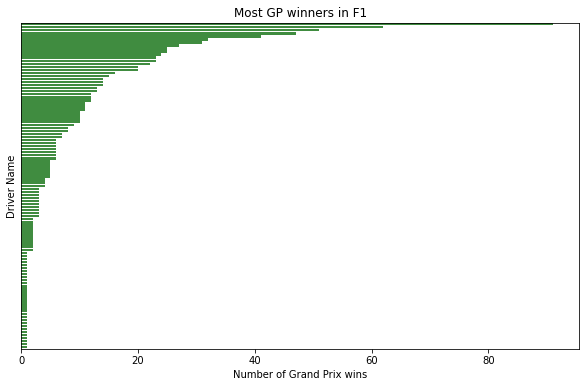

In [20]:
sns.barplot(data = driver_winner, y = 'driver', x = 'position_order', color = 'green', alpha = 0.8)
plt.title('Most GP winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of Grand Prix wins')
plt.yticks([])

### Creating new dataframe of top 10 Grand Prix winners

In [21]:
top_10_drivers = driver_winner.head(10)

In [22]:
top_10_drivers

,driver,position_order
0,michael_schumacher,91
1,hamilton,62
2,prost,51
3,vettel,47
4,senna,41
5,alonso,32
6,mansell,31
7,stewart,27
8,lauda,25
9,clark,25


### Displaying bar plot for top 10 drivers

Text(0.5, 0, 'Number of Grand Prix wins')

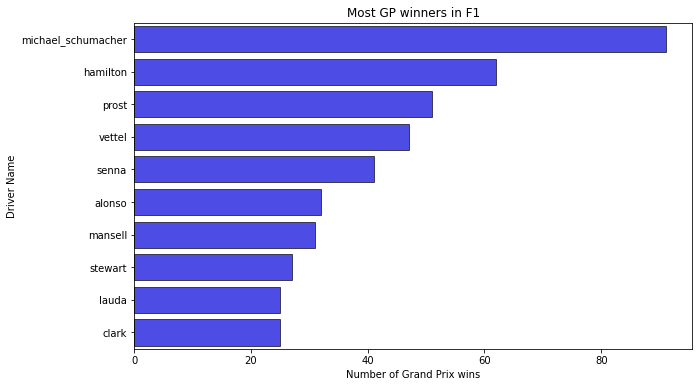

In [23]:
sns.barplot(data = top_10_drivers, y = 'driver', x = 'position_order', color = 'blue', alpha = 0.8, linewidth = .8, edgecolor = 'black')
plt.title('Most GP winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of Grand Prix wins')

### Displaying bar plot for top 10 constructors

In [24]:
constructor_winner = df.loc[df['position_order'] == 1].groupby('constructor_name')['position_order'].count().sort_values(ascending  = False).to_frame().reset_index()

([], [])

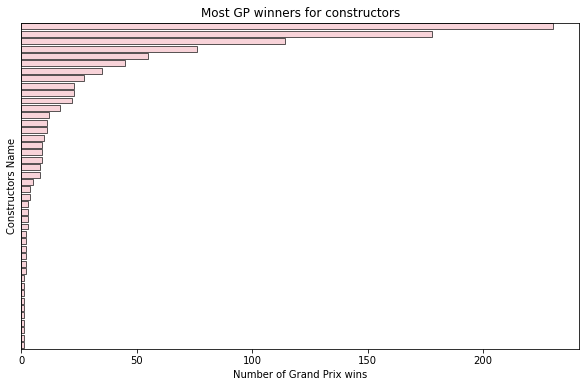

In [25]:
sns.barplot(data = constructor_winner, y = 'constructor_name', x = 'position_order', color = 'pink', alpha = 0.8, linewidth = .8, edgecolor='black')
plt.title('Most GP winners for constructors')
plt.ylabel('Constructors Name')
plt.xlabel('Number of Grand Prix wins')
plt.yticks([])

In [26]:
top_10_constructors = constructor_winner.head(10)

In [27]:
top_10_constructors.head(10)

,constructor_name,position_order
0,Ferrari,230
1,McLaren,178
2,Williams,114
3,Mercedes,76
4,Red Bull,55
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


Text(0.5, 0, 'Number of Grand Prix wins')

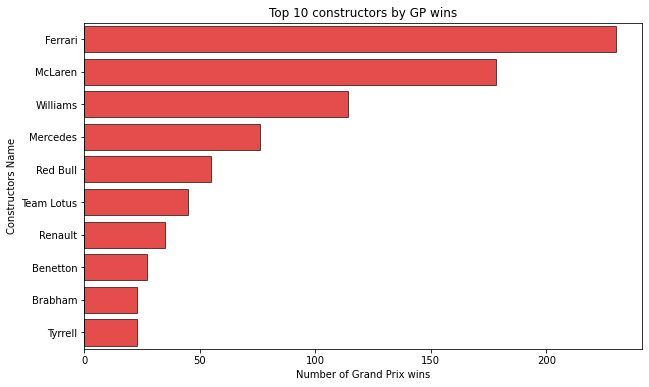

In [28]:
sns.barplot(data = top_10_constructors, y = 'constructor_name', x = 'position_order', color = 'red', alpha = 0.8, linewidth = .8, edgecolor = 'black')
plt.title('Top 10 constructors by GP wins')
plt.ylabel('Constructors Name')
plt.xlabel('Number of Grand Prix wins')

### Displaying regression plot for showing relation between Starting position and finishing position

In [29]:
df_no_zero = df[df['grid'] != 0]

Text(0.5, 0, 'Starting position')

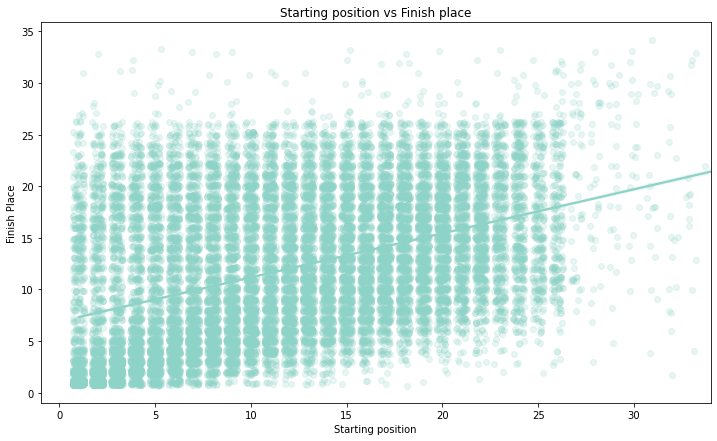

In [30]:
plt.figure(figsize = [12,7])
sns.regplot(data = df_no_zero, x = 'grid', y = 'position_order', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha': 1/5})
plt.title('Starting position vs Finish place')
plt.ylabel('Finish Place')
plt.xlabel('Starting position')

### Finding the rate of change in speed of cars

In [31]:
#creating new dataframe for season 2004 onwards
df_speed = df[df['year'] >= 2004]
df_group_speed = df.groupby(['gp_name', 'year'])['fastest_lap_speed'].mean().to_frame().reset_index()

Text(0.5, 0.98, 'Average speed amongst all teams during the fastest lap at individual GPs')

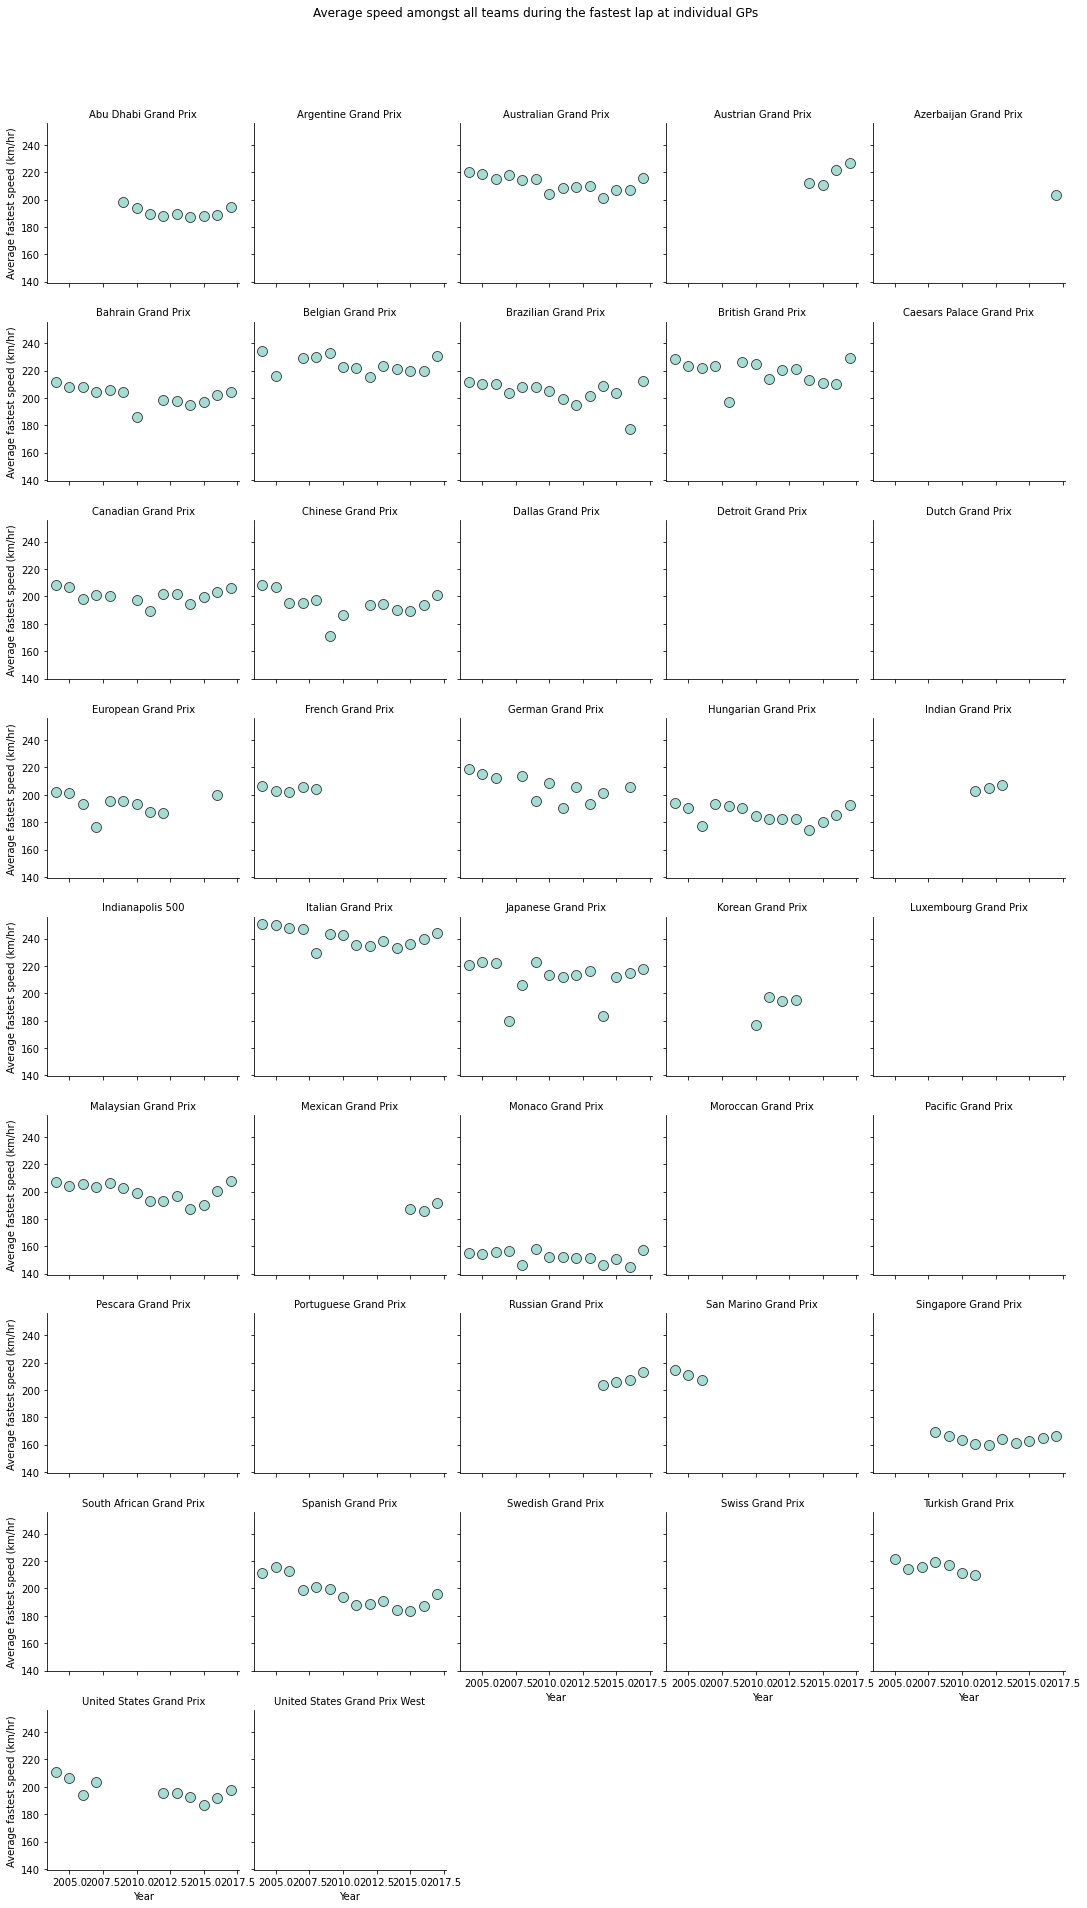

In [32]:
g = sns.FacetGrid(data = df_group_speed, col = 'gp_name', col_wrap = 5)
g.map(plt.scatter, 'year', 'fastest_lap_speed', alpha = 0.8, linewidth = .8, edgecolor = 'black', s = 100)
g.set_titles('{col_name}')
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/hr)')
plt.subplots_adjust(top = 0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs')